## Analysis

In [104]:
#create _describe.csv
import pandas as pd

#folder = "../workdir/AIS-ModelFrames/"
folderinput = "../workdir/AIS-TrainedModel/"

#filename = "aisdk-2023-11-08-s_2_knn_result_18000_10240"
filename = "aisdk-2023-11-08_1_knn_result_18000_10240"
folderoutput = f"../workdir/AIS-Images/{filename}/"

pd.set_option("display.float_format", lambda x: '%.1f' % x)

df_res = pd.read_csv(f"{folderinput}{filename}.csv")


#df_res_dis["bl_3_0"] = pd.DataFrame(df_res["bl_3_0"].describe())
df_res_dis = [0]*4*3*10
print(type(df_res_dis))
i = 0

for known in range(3, 13, 1):
    for noise in range(0, 11, 5):
        for alg in ("bl", "lr", "ml", "as"):

            # Baseline
            # print(f"bl_{known}_{noise}")
            df_res_dis[i] = (df_res[f"{alg}_{known}w{noise}"].describe())

            # # print(df_res_dis)
            # # Linear Regression
            # print(f"lr_{known}_{noise}")
            # print(df_res[f"lr_{known}_{noise}"].describe())
            #df_res_dis[i] = (df_res[f"bl_{known}_{noise}"].describe())

            # # Neural Network
            # print(f"nn_{known}_{noise}")
            # print(df_res[f"nn_{known}_{noise}"].describe())
            #df_res_dis[i] = (df_res[f"bl_{known}_{noise}"].describe())

            # # AutoSklearn
            # # print(f"as_{known}_{noise}")
            # # print(df_res[f"as_{known}_{noise}"].describe())
            #df_res_dis[i] = (df_res[f"bl_{known}_{noise}"].describe())
            i = i + 1



df_res_dis = str(df_res_dis)

df_res_dis = df_res_dis.replace("           ", ";")
df_res_dis = df_res_dis.replace("          ", ";")
df_res_dis = df_res_dis.replace("         ", ";")
df_res_dis = df_res_dis.replace("        ", ";")
df_res_dis = df_res_dis.replace("       ", ";")
df_res_dis = df_res_dis.replace("      ", ";")
df_res_dis = df_res_dis.replace("     ", ";")
df_res_dis = df_res_dis.replace("    ", ";")
df_res_dis = df_res_dis.replace("   ", ";")
df_res_dis = df_res_dis.replace("  ", ";")
df_res_dis = df_res_dis.replace("   ", ";")

#print(df_res_dis)



#df_res_dis = df_res_dis.replace("\r\n", "\\ \r\n")

## creating a new empty file or overwriting existend file
save_file = open(f"{folderoutput}{filename}_describe.csv", "w")
save_file.write(df_res_dis)
save_file.close()


<class 'list'>


## Visualisation

In [15]:
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"
folderoutput = "../workdir/AIS-Images/"

#filename = f"aisdk-2023-11-08-xs_2_knn"
filename = "aisdk-2023-11-08_1_knn_result_18000_10240"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

df_res.head(4)

,known_12_0,noise_12_0,bl_12_0,lr_12_0,ml_12_0,as_12_0,known_12_5,noise_12_5,bl_12_5,lr_12_5,...,bl_3_5,lr_3_5,ml_3_5,as_3_5,known_3_10,noise_3_10,bl_3_10,lr_3_10,ml_3_10,as_3_10
0,12,0,15.5,8.4,0.5,7.6,12,5,20.3,15.0,...,20.8,15.5,9.2,11.6,3,10,17.5,22.6,22.4,25.0
1,12,0,19.8,10.4,3.4,10.4,12,5,10.4,3.7,...,5.4,3.6,8.1,4.7,3,10,6.7,22.6,26.2,24.1
2,12,0,11.8,2.1,6.9,2.0,12,5,18.5,9.8,...,12.7,12.5,12.5,8.4,3,10,22.7,17.4,13.5,17.3
3,12,0,8.4,2.3,1.0,3.6,12,5,11.3,1.8,...,14.1,1.5,10.6,6.7,3,10,35.9,31.7,29.9,30.7


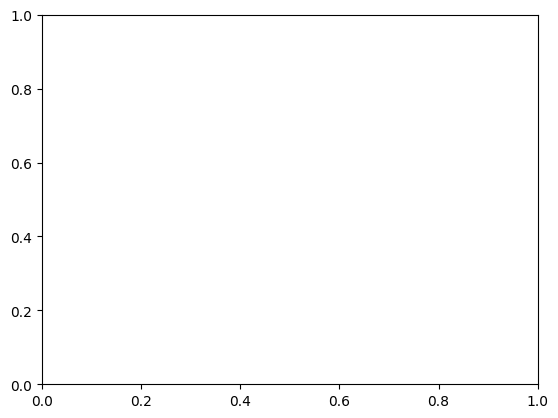

In [94]:
#Boxplot A_A_X

import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"

#filename = f"aisdk-2023-11-08-s_2_knn_result_18000_10240"
filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

#for known in range(3, 13, 1):
#    for noise in range(0, 11, 5):
#        df_res = df_res.rename(columns={f"nn_{known}_{noise}": f"ml_{known}_{noise}"})
#        #df_res[f" _{known}_{noise}"] = df_res[f"as_{known}_{noise}"]
#        #df_res[f" _{known}_{noise}"] = df_res[f" _{known}_{noise}"] * 0 + 30
#        df_res = df_res.drop(columns=[f"known_{known}_{noise}"])
#        df_res = df_res.drop(columns=[f"noise_{known}_{noise}"])
#        df_res = df_res.rename(columns={f"bl_{known}_{noise}": f"bl_{known}u{noise}w"})
#        df_res = df_res.rename(columns={f"lr_{known}_{noise}": f"lr_{known}u{noise}w"})
#        df_res = df_res.rename(columns={f"ml_{known}_{noise}": f"ml_{known}u{noise}w"})
#        df_res = df_res.rename(columns={f"as_{known}_{noise}": f"as_{known}u{noise}w"})




# BL vs XX 3 bis 12 -> 3 Bilder
for known in range(3, 13, 1):
    for noise in range(0, 11, 5):
#     for alg in ("lr", "nn", "as"):
        df_loc = df_res.copy()

        # df_loc = df_loc.filter(regex=f"bl|{alg}")
        df_loc = df_loc.filter(regex=f"_{known}w")
        df_loc = df_loc.filter(regex=f"w{noise}")
        df_loc = df_loc.filter(regex=f"bl|lr|ml|as")

        
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression"})
        df_loc = df_loc.rename(columns={f"ml_{known}w{noise}": f"MLP Regressor"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn"})
        #df_loc[f" {known}"] = df_loc[f"Auto Sklearn_{known}_{noise}"] * 0 + 30
        #if known == 3:
        #    df_loc[f" {known}"] = df_loc[f" {known}"] * 0

        #for alg in ("bl", "lr", "ml", "as"):
        #    df_loc = df_loc.rename(columns={f"{alg}_{known}_{noise}": f"{alg_names[alg]}_{known}_{noise}"})

        # Filter for outliers
        #Q1 = df_loc['AVG'].quantile(0.25)
        #Q3 = df_loc['AVG'].quantile(0.75)
        #IQR = Q3 - Q1    #IQR is interquartile range. 

        #filter = (df_loc['AVG'] >= Q1 - 1.5 * IQR) & (df_loc['AVG'] <= Q3 + 1.5 *IQR)
        #df_loc[filter]  

        #colors = {'bl': 'b', 'lr': 'r', 'ml': 'g', 'as': 'y', ' ': 'w'}
        #color=colors[alg], label=alg,


        

        df_loc.boxplot(showfliers=False, rot=90)
        
        #if noise == 0:
        #    plt.title(f"Vorhersage bei {known} bekannten Positionen ohne Rauschen")
        #else:
        #    plt.title(f"Vorhersage bei {known} bekannten Positionen und \n einem norm. Rauschen mit {noise} m Standardabweichung")
       
        #plt.legend(loc="upper left")
        plt.legend(bbox_to_anchor=(1.0, 1.0))

        plt.xlabel('Bekannte Positionen')
        plt.ylabel('Präzession in [m]')

        
        plt.show
        plt.savefig(f"{folderoutput}{filename}_test_{known}_{noise}_X.png", bbox_inches='tight', dpi=600)
        df_loc = []
        plt.cla()
        



#     for noise in range(0, 11, 5):
        # df_res.copy(df_res)
        # df_res = df_res.drop(columns=[f"known_{known}_{noise}",f"noise_{known}_{noise}"])
        # 
        # status_codes = {
        # 0: "b",
        # 5: "y",
        # 10: "m"
        # }
        # color =  status_codes.get(noise, "r")


        #df_res[f"bl_{known}_{noise}"].plot(kind='box')
        #df_res.boxplot(column=f"bl_{known}_{noise}") #, label=f"bl_{known}_{noise}")

        #plt.plot(df_res[f"known_{known}_{noise}"], df_res[f"bl_{known}_{noise}"], f"-{color}", label=f"bl_{known}_{noise}")



# df_res.plot(kind='box')


# df_res = df_res.filter(regex='bl|as')
# df_res = df_res.drop(columns=['as_12_0'])
# df_res = df_res.drop(columns=['as_12_5'])
# df_res = df_res.drop(columns=['as_12_10'])

# df_res = df_res.filter(regex='bl')

# df_res["bl_3_0"].plot(kind='box')
# df_res["bl_3_5"].plot(kind='box')

# bp = plt.boxplot(df_res, patch_artist=True)

# Use a color palette
# colors = plt.cm.Set3(np.linespace(0, 1, len(df_res)))
# for patch, color in zip(bp["boxes"], colors):
#     patch.set_facecolor(colors)



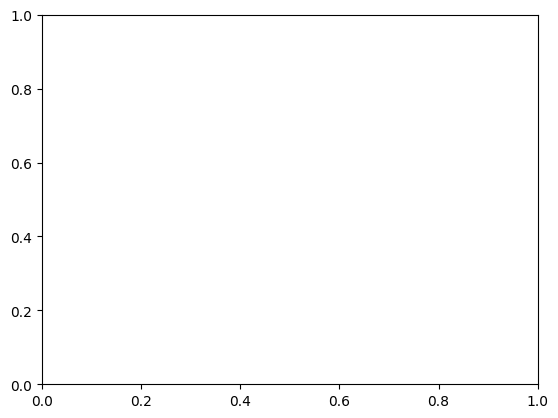

In [11]:
#Box plot X_A_A
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"

filename = f"aisdk-2023-11-08-xs_3_knn_result"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

# drop columns
for known in range(3, 13, 1):
    for noise in range(0, 11, 5):
        df_res = df_res.rename(columns={f"known_{known}_{noise}": f"known_{known}w{noise}"})
        df_res = df_res.rename(columns={f"noise_{known}_{noise}": f"noise_{known}w{noise}"})
        df_res = df_res.drop(columns=[f"known_{known}w{noise}"])
        df_res = df_res.drop(columns=[f"noise_{known}w{noise}"])


# sorting columns
for known in range(12, 2, -1):
    for noise in range(10, -1, -5):
        #for alg in ['as', 'ml', 'lr', 'bl']:
        for alg in ['ml', 'lr', 'bl']:

            first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
            df_tmp = df_res.copy()
            df_res = []
            df_res = df_tmp.copy()
            df_tmp = []
 
            df_res.insert(0, f"{alg}_{known}w{noise}", first_column)


# BL vs XX 3 bis 12 -> 3 Bilder
for noise in range(0, 11, 5):
    #for alg in ("bl", "lr", "ml", "as"):
    for alg in ("bl", "lr", "ml"):
        df_loc = df_res.copy()
        
        # df_loc = df_loc.filter(regex=f"bl|{alg}")
        df_loc = df_loc.filter(regex=f"{alg}")
        #df_loc = df_loc.filter(regex=f"_{known}w")
        df_loc = df_loc.filter(regex=f"w{noise}")
        #df_loc = df_loc.filter(regex=f"bl|lr|ml|as")

        #labels = {'bl': 'Baseline', 'lr': 'Lineare Regression', 'ml': 'MLP Regression', 'as': 'Auto Sklearn'}

        #plt.xlabel(f"{labels[alg]}")
        plt.xlabel(f"Bekannte Positionen")

        for known in range(3, 13, 1):
            df_loc = df_loc.rename(columns={f"{alg}_{known}w{noise}": f"{known}"})
            #df_loc = df_loc.rename(columns={f"lr_{known}_{noise}": f"{known}"})
            #df_loc = df_loc.rename(columns={f"ml_{known}_{noise}": f"{known}"})
            #df_loc = df_loc.rename(columns={f"as_{known}_{noise}": f"{known}"})
            #df_loc[f" {known}"] = df_loc[f"Auto Sklearn_{known}_{noise}"] * 0 + 30
            #if known == 3:
            #    df_loc[f" {known}"] = df_loc[f" {known}"] * 0

        
        

        df_loc.boxplot(showfliers=False, rot=90)
        #df_loc.boxplot()
        

        #plt.title(f"Vorhersage bei norm. Rauschen mit {noise} m \n Standardabweichung und {alg}")
        #plt.legend(loc="upper left")

        #plt.xlabel('Bekannte Positionen')
        plt.ylabel('Präzession in [m]')

        
        #plt.show
        plt.savefig(f"{folderoutput}{filename}_test_X_{noise}_{alg}.png", bbox_inches='tight', dpi=600)
        df_loc = []
        plt.cla()

In [56]:
# Datasorting
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"


#filename = f"aisdk-2023-11-08-s_2_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08-xs_2_knn_result"
filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

df_res_rev = [0]*4*3*10
#df_tmp = [0]*4*3*10
i = 0
print(df_res[f'bl_3_0'].describe())

for known in range(3, 13, 1):
    for noise in range(0, 11, 5):
        df_res = df_res.rename(columns={f"nn_{known}_{noise}": f"ml_{known}_{noise}"})
        #df_res[f" _{known}_{noise}"] = df_res[f"as_{known}_{noise}"]
        #df_res[f" _{known}_{noise}"] = df_res[f" _{known}_{noise}"] * 0 + 30
        df_res = df_res.drop(columns=[f"known_{known}_{noise}"])
        df_res = df_res.drop(columns=[f"noise_{known}_{noise}"])

for known in range(12, 2, -1):
    for noise in range(10, -1, -5):
        for alg in ['as', 'ml', 'lr', 'bl']:

            first_column = df_res.pop(f"{alg}_{known}_{noise}") 
    
            df_tmp = df_res.copy()
            df_res = df_tmp.copy()
            df_tmp = []
 
            df_res.insert(0, f"{alg}_{known}_{noise}", first_column) 
df_res.head(4)

print(df_res[f'bl_3_0'].describe())

count   1112344.0
mean         26.6
std          25.0
min           0.0
25%           3.9
50%          17.4
75%          46.9
max         299.9
Name: bl_3_0, dtype: float64
count   1112344.0
mean         26.6
std          25.0
min           0.0
25%           3.9
50%          17.4
75%          46.9
max         299.9
Name: bl_3_0, dtype: float64


In [64]:
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"


#filename = f"aisdk-2023-11-08-s_2_knn_result_18000_10240"
#filename = f"aisdk-2023-11-08-xs_2_knn_result"
filename = f"aisdk-2023-11-08_1_knn_result_18000_10240"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")

df_res['new'] = df_res['as_3_0'] 
print(df_res['new'].describe())

count   1112344.0
mean          3.9
std           5.4
min           0.0
25%           1.1
50%           2.3
75%           4.8
max         203.3
Name: new, dtype: float64


      bl_3w0     lr_3w0     ml_3w0     bl_3w5     lr_3w5     ml_3w5  \
0  26.394128  24.253028  16.651340  27.858544  22.582815  16.303150   
1  29.757184   7.056417   7.658877  33.150878  15.799069  19.804639   
2  26.705243   4.495020   4.359024  26.755065   9.731364  12.925182   
3  24.423759   3.344096   4.903927  20.627468   4.169254   7.412577   

     bl_3w10    lr_3w10    ml_3w10     bl_4w0  ...   ml_11w10    bl_12w0  \
0  31.943668  21.281615  14.814734  26.394128  ...  19.345059  26.705243   
1  36.503627  22.687746  20.822540  29.757184  ...   6.900065  24.423759   
2  22.238704  10.278788   8.015358  26.705243  ...  26.967045  21.576144   
3  18.128046   4.652786   6.130545  24.423759  ...  29.407487  21.154905   

    lr_12w0    ml_12w0    bl_12w5    lr_12w5    ml_12w5   bl_12w10   lr_12w10  \
0  1.481030  29.254066  22.944858   3.778703  29.034530  18.567347  16.430746   
1  3.117563   3.996218  24.044755   7.228658  18.741644  37.382846   8.609529   
2  3.059537  37.7734

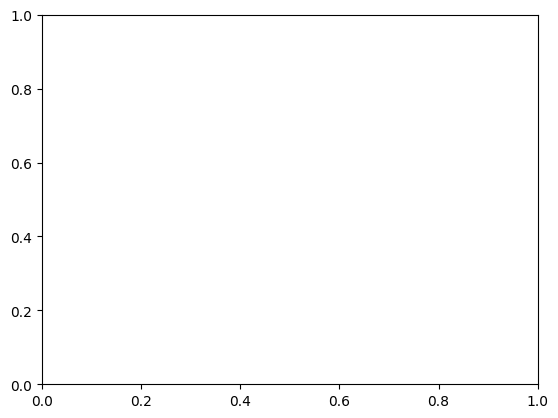

In [39]:
# Median X_A_X
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"


#filename = f"aisdk-2023-11-08-s_2_knn_result_18000_10240"
filename = f"aisdk-2023-11-08-xs_3_knn_result"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_new"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")


# drop columns
for known in range(3, 13, 1):
    for noise in range(0, 11, 5):
        df_res = df_res.rename(columns={f"known_{known}_{noise}": f"known_{known}w{noise}"})
        df_res = df_res.rename(columns={f"noise_{known}_{noise}": f"noise_{known}w{noise}"})
        df_res = df_res.drop(columns=[f"known_{known}w{noise}"])
        df_res = df_res.drop(columns=[f"noise_{known}w{noise}"])


#print(df_res.head(4))
# sorting columns
for known in range(12, 2, -1):
    for noise in range(10, -1, -5):
        #for alg in ['as', 'ml', 'lr', 'bl']:
        for alg in ['ml', 'lr', 'bl']:

            first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
            df_tmp = df_res.copy()
            df_res = []
            df_res = df_tmp.copy()
            df_tmp = []
 
            df_res.insert(0, f"{alg}_{known}w{noise}", first_column)

print(df_res.head(4))

# df_res.median().plot(kind='box', rot=45, showfliers=False)

# df_res.boxplot(rot=45, showfliers=False, figsize=(20, 10))
# plt.ylabel('Values')
# plt.title('Boxplot of Every Column in df_res')
# plt.show()


# df_res.median().plot(style='o', figsize=(20, 10))
# plt.ylabel('Median Values')
# plt.title('Median of Every Column in df_res')
# plt.show()


for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")
    #df_res = df_loc.filter
    print(df_loc.head(4))
    


    for known in range(3, 13, 1):
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"ml_{known}w{noise}": f"MLP Regressor_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn_{known}_{noise}"})
        df_loc[f" {known}"] = df_loc[f"Baseline_{known}_{noise}"] * 0 + 30
        if known == 3:
            df_loc[f" {known}"] = df_loc[f" {known}"] * 0

        #df_loc[f" _{known}"] = df_loc[f" _{known}"] * 0 + 30

    

    #for known in range(3, 13, 3):
        #df_loc[f" _{known}"] = df_loc[f"as_{known}_{noise}"]
        #df_loc[f" _{known}"] = df_loc[f" _{known}"] * 0 + 30
        

        #for alg in ("bl", "lr", "ml", "as"): 
        #if df_loc.columns.str.contains(f"_{known}_{noise}").any():
        #    df_loc = df_loc.drop(columns=[f"_{known}_{noise}"])
        #df_loc = df_loc.filter(regex=f"_{known}_{noise}")
        #df_res[f" _{known}_{noise}"] = df_res[f"as_{known}_{noise}"]
        #df_res[f" _{known}_{noise}"] = df_res[f" _{known}_{noise}"] * 0 + 30
        #df_loc = df_loc.rename(columns={f"_{known}_{noise}": f"{known}"})

    #print(df_loc.head(4))
    

    colors = {'Baseline': 'b', 'Lineare Regression': 'r', 'MLP Regressor': 'g', 'Auto Sklearn': 'y', ' ': 'w'}

    for alg in ['Baseline', 'Lineare Regression', 'MLP Regressor', 'Auto Sklearn', ' ']:
        df_loc.filter(regex=f'^{alg}').median().plot(style='o', color=colors[alg], label=alg, rot=0) #, figsize=(10, 10))
        #plt.xticks(df_loc[f'^{alg}_'], labels=[f"{known}_{noise}" for known in range(3, 13, 3)])

    plt.ylabel('Präzession in [m]')
    plt.xlabel('Bekannte Positionen')

    #xticks_labels = [col.replace('as_', '') for col in df_res.columns if col.startswith('as_')]
    #plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels, rotation=45)
    
    #plt.title('Median of Every Column in df_res as Points with Different Categories in Different Colors')
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    
    #plt.show()

    plt.savefig(f"{folderoutput}{filename}_test_X_{noise}_X_Median.png", bbox_inches='tight', dpi=600)
    df_loc = []
    plt.cla()


#df_loc.head(4)


In [ ]:
# Calculate the medians of the columns
medians = df_res.median()

# Plot the medians
medians.plot(kind='bar', figsize=(20, 10))

# Rename the x-axis metric
plt.xlabel('Metrics')

# Set the y-axis label
plt.ylabel('Median Values')

# Set the title of the plot
plt.title('Median of Every Column in df_res')

# Show the plot
plt.show()
# Add a slight wiggle to the x-axis positions to avoid overlap
x_positions = range(len(medians))
wiggle = 0.1 * (np.random.rand(len(medians)) - 0.5)

# Plot the medians with wiggle
plt.bar(x_positions + wiggle, medians, align='center')

# Rename the x-axis metric
plt.xlabel('Metrics')

# Set the y-axis label
plt.ylabel('Median Values')

# Set the title of the plot
plt.title('Median of Every Column in df_res')

# Show the plot
plt.show()

In [77]:
# Outliere X_A_X
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"


#filename = f"aisdk-2023-11-08-s_2_knn_result_18000_10240"
filename = f"aisdk-2023-11-08-xs_3_knn_result"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_new"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")
var_list = []

# drop columns
for known in range(3, 13, 1):
    for noise in range(0, 11, 5):
        df_res = df_res.rename(columns={f"known_{known}_{noise}": f"known_{known}w{noise}"})
        df_res = df_res.rename(columns={f"noise_{known}_{noise}": f"noise_{known}w{noise}"})
        df_res = df_res.drop(columns=[f"known_{known}w{noise}"])
        df_res = df_res.drop(columns=[f"noise_{known}w{noise}"])


#print(df_res.head(4))
# sorting columns
for known in range(12, 2, -1):
    for noise in range(10, -1, -5):
        #for alg in ['as', 'ml', 'lr', 'bl']:
        for alg in ['ml', 'lr', 'bl']:

            first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
            df_tmp = df_res.copy()
            df_res = []
            df_res = df_tmp.copy()
            df_tmp = []
 
            df_res.insert(0, f"{alg}_{known}w{noise}", first_column)

# print(df_res.head(4))

# df_res.median().plot(kind='box', rot=45, showfliers=False)

# df_res.boxplot(rot=45, showfliers=False, figsize=(20, 10))
# plt.ylabel('Values')
# plt.title('Boxplot of Every Column in df_res')
# plt.show()


# df_res.median().plot(style='o', figsize=(20, 10))
# plt.ylabel('Median Values')
# plt.title('Median of Every Column in df_res')
# plt.show()


for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")
    #df_res = df_loc.filter
    # print(df_loc.head(4))
    


    for known in range(3, 13, 1):
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"ml_{known}w{noise}": f"MLP Regressor_{known}_{noise}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn_{known}_{noise}"})
        # df_loc[f" {known}"] = df_loc[f"Baseline_{known}_{noise}"] * 0 + 30
        # if known == 3:
        #     df_loc[f" {known}"] = df_loc[f" {known}"] * 0

        #df_loc[f" _{known}"] = df_loc[f" _{known}"] * 0 + 30

    

    #for known in range(3, 13, 3):
        #df_loc[f" _{known}"] = df_loc[f"as_{known}_{noise}"]
        #df_loc[f" _{known}"] = df_loc[f" _{known}"] * 0 + 30
        

        #for alg in ("bl", "lr", "ml", "as"): 
        #if df_loc.columns.str.contains(f"_{known}_{noise}").any():
        #    df_loc = df_loc.drop(columns=[f"_{known}_{noise}"])
        #df_loc = df_loc.filter(regex=f"_{known}_{noise}")
        #df_res[f" _{known}_{noise}"] = df_res[f"as_{known}_{noise}"]
        #df_res[f" _{known}_{noise}"] = df_res[f" _{known}_{noise}"] * 0 + 30
        #df_loc = df_loc.rename(columns={f"_{known}_{noise}": f"{known}"})

    #print(df_loc.head(4))
    

    colors = {'Baseline': 'b', 'Lineare Regression': 'r', 'MLP Regressor': 'g', 'Auto Sklearn': 'y', ' ': 'w'}

    # for alg in ['Baseline', 'Lineare Regression', 'MLP Regressor', 'Auto Sklearn', ' ']:
    #     df_loc.filter(regex=f'^{alg}').median().plot(style='o', color=colors[alg], label=alg, rot=0) #, figsize=(10, 10))
        #plt.xticks(df_loc[f'^{alg}_'], labels=[f"{known}_{noise}" for known in range(3, 13, 3)])

    for alg in ['Baseline', 'Lineare Regression', 'MLP Regressor']: #'Auto Sklearn', ' ']:
        for known in range (3, 13, 1):
            #    df_loc = df_loc.rename(columns={f"{alg}_{known}_{noise}": f"{alg_names[alg]}_{known}_{noise}"})

            # Filter for outliers
            Q1 = df_loc[f"{alg}_{known}_{noise}"].quantile(0.25)
            Q3 = df_loc[f"{alg}_{known}_{noise}"].quantile(0.75)
            IQR = Q3 - Q1    #IQR is interquartile range. 

            df_loc[f'fi_{alg}_{known}_{noise}'] = (df_loc[f"{alg}_{known}_{noise}"] >= Q1 - 1.5 * IQR) & (df_loc[f"{alg}_{known}_{noise}"] <= Q3 + 1.5 *IQR)
            #print((df_loc[f"{alg}_{known}_{noise}"] >= Q1 - 1.5 * IQR) & (df_loc[f"{alg}_{known}_{noise}"] <= Q3 + 1.5 *IQR))
            #df_loc[filter]  

            #colors = {'bl': 'b', 'lr': 'r', 'ml': 'g', 'as': 'y', ' ': 'w'}
            #color=colors[alg], label=alg,
            # print(type(df_loc))
            #print(df_loc.head(4))
            
            #fsd
            
            # print(df_loc[f'fi_{alg}_{known}_{noise}'])
            print(df_loc[f'fi_{alg}_{known}_{noise}'].value_counts())
            # print(type(df_loc[f'fi_{alg}_{known}_{noise}'][0]))
            # print(df_loc[f'fi_{alg}_{known}_{noise}'][0])
            # substring = 'True'
            # ds_tmp = df_loc[f'fi_{alg}_{known}_{noise}'].copy()
            # print(df_tmp.head(4))
            # print(type(ds_tmp))
            # ds_tmp.drop(True)
            # ds_tmp.index

            
            # #df_tmp = df_loc[f'fi_{alg}_{known}_{noise}'].str.contains(substring)
            # #df_tmp.drop(df_tmp[df_tmp[f'fi_{alg}_{known}_{noise}'] == False].index, inplace=True)
            # df_tmp = df_tmp[df_tmp[f'fi_{alg}_{known}_{noise}'] == False]
            # print(df_tmp[f'fi_{alg}_{known}_{noise}'].count())
            
            var_list.append(df_loc[f'fi_{alg}_{known}_{noise}'].value_counts())
            #print(var_list)


    # plt.ylabel('Präzession in [m]')
    # plt.xlabel('Bekannte Positionen')

    #xticks_labels = [col.replace('as_', '') for col in df_res.columns if col.startswith('as_')]
    #plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels, rotation=45)
    
    #plt.title('Median of Every Column in df_res as Points with Different Categories in Different Colors')
    # plt.legend(bbox_to_anchor=(1.0, 1.0))
    
    # plt.show()

    # #plt.savefig(f"{folderoutput}{filename}_test_X_{noise}_X_Median.png", bbox_inches='tight', dpi=600)
    # df_loc = []
    # plt.cla()
var_list = str(var_list)
var_list = var_list.replace("False", "")


save_file = open(f"{folderoutput}{filename}_outliers.csv", "w")
save_file.write(var_list)
save_file.close()


# df_loc.head(4)
# print(var_list)


fi_Baseline_3_0
True     1877
False     299
Name: count, dtype: int64
fi_Baseline_4_0
True     1877
False     299
Name: count, dtype: int64
fi_Baseline_5_0
True     1877
False     299
Name: count, dtype: int64
fi_Baseline_6_0
True     1885
False     291
Name: count, dtype: int64
fi_Baseline_7_0
True     1885
False     291
Name: count, dtype: int64
fi_Baseline_8_0
True     1885
False     291
Name: count, dtype: int64
fi_Baseline_9_0
True     1885
False     291
Name: count, dtype: int64
fi_Baseline_10_0
True     1885
False     291
Name: count, dtype: int64
fi_Baseline_11_0
True     1888
False     288
Name: count, dtype: int64
fi_Baseline_12_0
True     1888
False     288
Name: count, dtype: int64
fi_Lineare Regression_3_0
True     1925
False     251
Name: count, dtype: int64
fi_Lineare Regression_4_0
True     1861
False     315
Name: count, dtype: int64
fi_Lineare Regression_5_0
True     1893
False     283
Name: count, dtype: int64
fi_Lineare Regression_6_0
True     1901
False     275
Nam

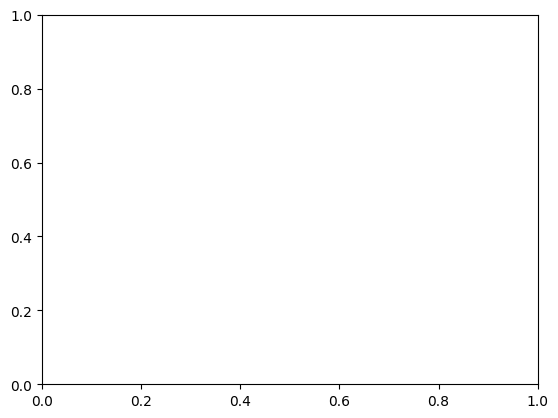

In [38]:
# Median X_X_X
import pandas as pd
from matplotlib import pyplot as plt

folderinput = "../workdir/AIS-TrainedModel/"


#filename = f"aisdk-2023-11-08-s_2_knn_result_18000_10240"
filename = f"aisdk-2023-11-08-xs_3_knn_result"
#filename = f"aisdk-2023-11-08_1_knn_result_18000_10240_new"

folderoutput = f"../workdir/AIS-Images/{filename}/"

df_res = pd.read_csv(f"{folderinput}{filename}.csv")


# drop columns
for known in range(3, 13, 1):
    for noise in range(0, 11, 5):
        df_res = df_res.rename(columns={f"known_{known}_{noise}": f"known_{known}w{noise}"})
        df_res = df_res.rename(columns={f"noise_{known}_{noise}": f"noise_{known}w{noise}"})
        df_res = df_res.drop(columns=[f"known_{known}w{noise}"])
        df_res = df_res.drop(columns=[f"noise_{known}w{noise}"])


#print(df_res.head(4))
# sorting columns
for known in range(12, 2, -1):
    for noise in range(10, -1, -5):
        #for alg in ['as', 'ml', 'lr', 'bl']:
        for alg in ['ml', 'lr', 'bl']:

            first_column = df_res.pop(f"{alg}_{known}w{noise}") 
    
            df_tmp = df_res.copy()
            df_res = []
            df_res = df_tmp.copy()
            df_tmp = []
 
            df_res.insert(0, f"{alg}_{known}w{noise}", first_column)

# print(df_res.head(4))

# print(type(df_res))
# print(df_res.head(4))
# df_tmp = pd.DataFrame(df_res['bl_3w0'].copy())
# print(type(df_tmp))
# #print(df_tmp.head(4))

# for alg in ['bl', 'lr', 'ml', ' ']: #, 'as']:
#     for noise in range(0, 11, 5):
#         for known in range(3, 13, 1):
#             df_tmp[f'{alg}_{known}w{noise}'] = df_res[f'{alg}_{known}w{noise}']

# df_res = []
# df_res = df_tmp.copy()
# df_tmp = []
# df_tmp = df_res.copy()

# df_res = df_tmp.copy()
# df_tmp = []


# print(df_res.shape)

# print(df_res.head(4))


for noise in range(0, 11, 5):
    df_loc = df_res.copy()
    df_loc = df_loc.filter(regex=f"w{noise}")

    for known in range(3, 13, 1):
        df_loc = df_loc.rename(columns={f"bl_{known}w{noise}": f"Baseline s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"lr_{known}w{noise}": f"Lineare Regression s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"ml_{known}w{noise}": f"MLP Regressor s = {noise} m {known}"})
        df_loc = df_loc.rename(columns={f"as_{known}w{noise}": f"Auto Sklearn s = {noise} m {known}"})
        df_loc[f" {known}"] = df_loc[f"Baseline s = {noise} m {known}"] * 0 + 30
        if known == 3:
            df_loc[f" {known}"] = df_loc[f" {known}"] * 0


    # print(df_loc.head(4))


    if noise == 0:
        # colors = {'bl_0': 'blue', 'lr_0': 'red', 'ml_0': 'green', 'as_0': 'yellow', ' 0': 'w', 'bl_5': 'navy', 'lr_5': 'darkred', 'ml_5': 'darkgreen', 'as_5': 'darkgoldenrod', ' 5': 'w', 'bl_10': 'royalblue', 'lr_10': 'indianred', 'ml_10': 'lightgreen', 'as_10': 'khaki', ' 10': 'w'}
        # alg_def = ['bl_0', 'lr_0', 'ml_0', ' 0', 'bl_5', 'lr_5', 'ml_5', ' 5', 'bl_10', 'lr_10', 'ml_10', ' 10']
        alg_def = ['Baseline s = 0 m', 'Lineare Regression s = 0 m', 'MLP Regressor s = 0 m', ' ']
        colors = {'Baseline s = 0 m': 'blue', 'Lineare Regression s = 0 m': 'red', 'MLP Regressor s = 0 m': 'green', 'Auto Sklearn s = 0 m': 'yellow', ' ': 'w'}
    # colors = {'bl': 'b', 'lr': 'r', 'ml': 'g', 'as': 'y', ' ': 'w'}
        # addit = 0

    elif noise == 5:
         alg_def = ['Baseline s = 5 m', 'Lineare Regression s = 5 m', 'MLP Regressor s = 5 m', ' ']
         colors = {'Baseline s = 5 m': 'navy', 'Lineare Regression s = 5 m': 'darkred', 'MLP Regressor s = 5 m': 'darkgreen', 'Auto Sklearn s = 5 m': 'darkgoldenrod', ' ': 'w'}
        #  colors = {'bl': 'navy', 'lr': 'darkred', 'ml': 'darkgreen', 'as': 'darkgoldenrod', ' ': 'w'}
    #     addit = 0.5
    elif noise == 10:
        alg_def = ['Baseline s = 10 m', 'Lineare Regression s = 10 m', 'MLP Regressor s = 10 m', ' ']
        colors = {'Baseline s = 10 m': 'royalblue', 'Lineare Regression s = 10 m': 'indianred', 'MLP Regressor s = 10 m': 'lightgreen', 'Auto Sklearn s = 10 m': 'khaki', ' ': 'w'}

        # for known in range(3, 13, 1):
        #     df_loc = df_loc.rename(columns={f" {known}"})
    #     colors = {'bl': 'royalblue', 'lr': 'indianred', 'ml': 'lightgreen', 'as': 'khaki', ' ': 'w'}
    #     addit = 1

    #         ## Offset noise 5 by 0.5 10 by 1.
    #     for known in range(3,13,3):
    #         df_loc = df_loc.rename()

    for alg in alg_def:
        df_loc.filter(regex=f'^{alg}').median().plot(style='o', color=colors[alg], label=alg, rot=0) #, figsize=(10, 10))

plt.ylabel('Präzession in [m]')
plt.xlabel('Bekannte Positionen')

# #xticks_labels = [col.replace('as_', '') for col in df_res.columns if col.startswith('as_')]
# #plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels, rotation=45)
plt.legend(bbox_to_anchor=(1.0, 1.0))
# #plt.title('Median of Every Column in df_res as Points with Different Categories in Different Colors')
# plt.legend()
# plt.show()

plt.savefig(f"{folderoutput}{filename}_test_X_X_X_Median.png", bbox_inches='tight', dpi=600)
df_loc = []
plt.cla()

In [ ]:
# Number of outliers

In [48]:
df_res.boxplot(rot=45, showfliers=False, figsize=(20, 10))
plt.ylabel('Values')
plt.title('Boxplot of Every Column in df_res')
plt.show()
df_res.median().plot(kind='bar', figsize=(20, 10))
plt.ylabel('Median Values')
plt.title('Median of Every Column in df_res')
plt.show()
df_res.median().plot(style='o', figsize=(20, 10))
plt.ylabel('Median Values')
plt.title('Median of Every Column in df_res as Points')
plt.show()
colors = {'bl': 'b', 'lr': 'r', 'ml': 'g', 'as': 'y'}

for alg in ['bl', 'lr', 'ml', 'as']:
    df_res.filter(regex=f'^{alg}_').median().plot(style='o', color=colors[alg], label=alg, figsize=(20, 10))

plt.ylabel('Median Values')
plt.title('Median of Every Column in df_res as Points with Different Categories in Different Colors')
plt.legend()

# Set xticks without "as_"
xticks_labels = [col.replace('as_', '') for col in df_res.columns if col.startswith('as_')]
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels, rotation=45)

plt.show()

AssertionError: 9

<function matplotlib.pyplot.show(close=None, block=None)>

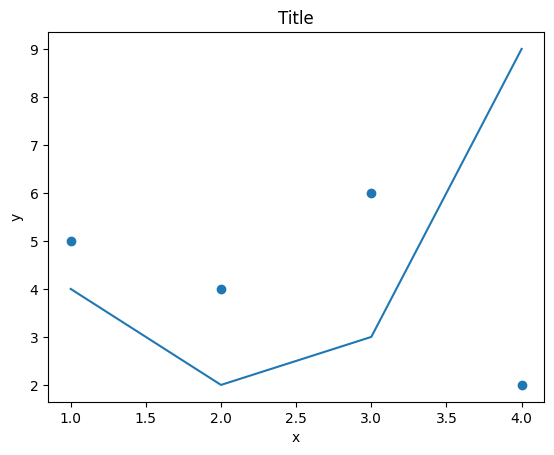

In [9]:
from matplotlib import pyplot as plt


x_values = [1, 2, 3 ,4]
y_values = [5, 4, 6, 2]

plt.scatter(x_values, y_values)

other_x_values = [1, 2, 3, 4]
other_y_values = [4, 2, 3, 9]

plt.plot(other_x_values, other_y_values)

plt.title('Title')

plt.xlabel('x')
plt.ylabel('y')

plt.show

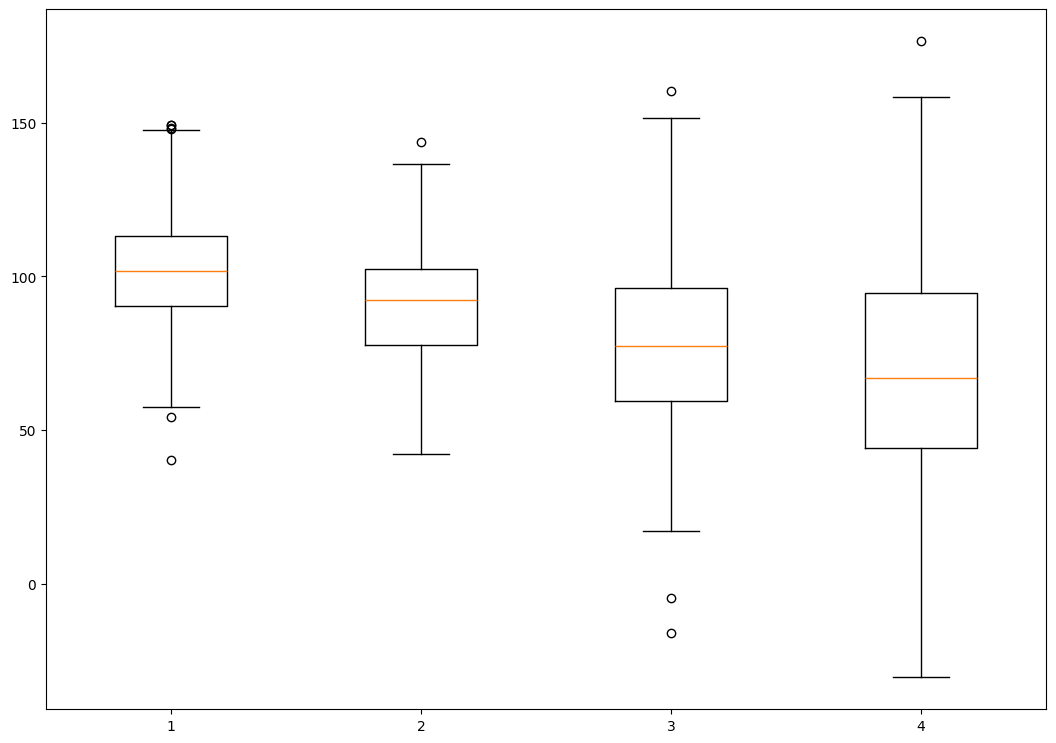

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Creating dataset

np.random.seed(10)
data_1 = np.random.normal(100, 20, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)

data = [data_1, data_2, data_3, data_4]

fig = plt.figure(figsize = (10, 7))

# # Creating plot
# plt.boxplot(data)

# Crating axes instance

ax = fig.add_axes([0,0,1,1])

bp = ax.boxplot(data)

#show plot
plt.show()

#print(data)

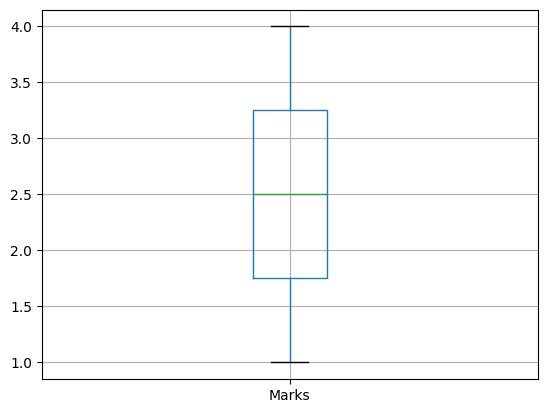

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# create a dataframe

data = pd.DataFrame({'Name' : ["A", "B", "C", "D"],
                     "Marks" : [1, 2, 3, 4],
                     "Credits": [16, 8, 4, 2]})

#box plot
# data["Marks"].plot(kind='box')
data.boxplot(column='Marks')
plt.show()